In [3]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

In [2]:
col_names = pd.read_csv('datasets/features_edited.txt', header = None)
features = col_names[0].str.strip().to_list()
datasets_filepath = ['Train/X_train',
                     'Train/y_train',
                     'Test/X_test',
                     'Test/y_test']
df = []
for filepath in datasets_filepath:
    df.append(pd.read_csv('datasets/' + filepath + '.txt', sep = ' ', header = None))
x_train, y_train, x_test, y_test = df[0], df[1], df[2], df[3]
x_train.columns, x_test.columns = features, features
y_train.columns, y_test.columns = ['Activity',], ['Activity',]
x_train.head()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,tBodyAcc-Max-2,tBodyAcc-Max-3,tBodyAcc-Min-1,tBodyAcc-Min-2,tBodyAcc-Min-3,tBodyAcc-SMA-1,tBodyAcc-Energy-1,tBodyAcc-Energy-2,tBodyAcc-Energy-3,tBodyAcc-IQR-1,tBodyAcc-IQR-2,tBodyAcc-IQR-3,tBodyAcc-ropy-1,tBodyAcc-ropy-2,tBodyAcc-ropy-3,tBodyAcc-ARCoeff-1,tBodyAcc-ARCoeff-2,tBodyAcc-ARCoeff-3,tBodyAcc-ARCoeff-4,tBodyAcc-ARCoeff-5,tBodyAcc-ARCoeff-6,tBodyAcc-ARCoeff-7,tBodyAcc-ARCoeff-8,tBodyAcc-ARCoeff-9,tBodyAcc-ARCoeff-10,tBodyAcc-ARCoeff-11,tBodyAcc-ARCoeff-12,tBodyAcc-Correlation-1,tBodyAcc-Correlation-2,tBodyAcc-Correlation-3,tGravityAcc-Mean-1,tGravityAcc-Mean-2,tGravityAcc-Mean-3,tGravityAcc-STD-1,tGravityAcc-STD-2,tGravityAcc-STD-3,tGravityAcc-Mad-1,tGravityAcc-Mad-2,tGravityAcc-Mad-3,tGravityAcc-Max-1,tGravityAcc-Max-2,tGravityAcc-Max-3,tGravityAcc-Min-1,tGravityAcc-Min-2,tGravityAcc-Min-3,tGravityAcc-SMA-1,tGravityAcc-Energy-1,tGravityAcc-Energy-2,tGravityAcc-Energy-3,tGravityAcc-IQR-1,tGravityAcc-IQR-2,tGravityAcc-IQR-3,tGravityAcc-ropy-1,tGravityAcc-ropy-2,tGravityAcc-ropy-3,tGravityAcc-ARCoeff-1,tGravityAcc-ARCoeff-2,tGravityAcc-ARCoeff-3,tGravityAcc-ARCoeff-4,tGravityAcc-ARCoeff-5,tGravityAcc-ARCoeff-6,tGravityAcc-ARCoeff-7,tGravityAcc-ARCoeff-8,tGravityAcc-ARCoeff-9,tGravityAcc-ARCoeff-10,tGravityAcc-ARCoeff-11,tGravityAcc-ARCoeff-12,tGravityAcc-Correlation-1,tGravityAcc-Correlation-2,tGravityAcc-Correlation-3,tBodyAccJerk-Mean-1,tBodyAccJerk-Mean-2,tBodyAccJerk-Mean-3,tBodyAccJerk-STD-1,tBodyAccJerk-STD-2,tBodyAccJerk-STD-3,tBodyAccJerk-Mad-1,tBodyAccJerk-Mad-2,tBodyAccJerk-Mad-3,tBodyAccJerk-Max-1,tBodyAccJerk-Max-2,tBodyAccJerk-Max-3,tBodyAccJerk-Min-1,tBodyAccJerk-Min-2,tBodyAccJerk-Min-3,tBodyAccJerk-SMA-1,tBodyAccJerk-Energy-1,tBodyAccJerk-Energy-2,tBodyAccJerk-Energy-3,tBodyAccJerk-IQR-1,tBodyAccJerk-IQR-2,tBodyAccJerk-IQR-3,tBodyAccJerk-ropy-1,tBodyAccJerk-ropy-2,tBodyAccJerk-ropy-3,tBodyAccJerk-ARCoeff-1,tBodyAccJerk-ARCoeff-2,tBodyAccJerk-ARCoeff-3,tBodyAccJerk-ARCoeff-4,tBodyAccJerk-ARCoeff-5,tBodyAccJerk-ARCoeff-6,tBodyAccJerk-ARCoeff-7,tBodyAccJerk-ARCoeff-8,tBodyAccJerk-ARCoeff-9,tBodyAccJerk-ARCoeff-10,tBodyAccJerk-ARCoeff-11,tBodyAccJerk-ARCoeff-12,tBodyAccJerk-Correlation-1,tBodyAccJerk-Correlation-2,tBodyAccJerk-Correlation-3,tBodyGyro-Mean-1,tBodyGyro-Mean-2,tBodyGyro-Mean-3,tBodyGyro-STD-1,tBodyGyro-STD-2,tBodyGyro-STD-3,tBodyGyro-Mad-1,tBodyGyro-Mad-2,tBodyGyro-Mad-3,tBodyGyro-Max-1,tBodyGyro-Max-2,tBodyGyro-Max-3,tBodyGyro-Min-1,tBodyGyro-Min-2,tBodyGyro-Min-3,tBodyGyro-SMA-1,tBodyGyro-Energy-1,tBodyGyro-Energy-2,tBodyGyro-Energy-3,tBodyGyro-IQR-1,tBodyGyro-IQR-2,tBodyGyro-IQR-3,tBodyGyro-ropy-1,tBodyGyro-ropy-2,tBodyGyro-ropy-3,tBodyGyro-ARCoeff-1,tBodyGyro-ARCoeff-2,tBodyGyro-ARCoeff-3,tBodyGyro-ARCoeff-4,tBodyGyro-ARCoeff-5,tBodyGyro-ARCoeff-6,tBodyGyro-ARCoeff-7,tBodyGyro-ARCoeff-8,tBodyGyro-ARCoeff-9,tBodyGyro-ARCoeff-10,tBodyGyro-ARCoeff-11,tBodyGyro-ARCoeff-12,tBodyGyro-Correlation-1,tBodyGyro-Correlation-2,tBodyGyro-Correlation-3,tBodyGyroJerk-Mean-1,tBodyGyroJerk-Mean-2,tBodyGyroJerk-Mean-3,tBodyGyroJerk-STD-1,tBodyGyroJerk-STD-2,tBodyGyroJerk-STD-3,tBodyGyroJerk-Mad-1,tBodyGyroJerk-Mad-2,tBodyGyroJerk-Mad-3,tBodyGyroJerk-Max-1,tBodyGyroJerk-Max-2,tBodyGyroJerk-Max-3,tBodyGyroJerk-Min-1,tBodyGyroJerk-Min-2,tBodyGyroJerk-Min-3,tBodyGyroJerk-SMA-1,tBodyGyroJerk-Energy-1,tBodyGyroJerk-Energy-2,tBodyGyroJerk-Energy-3,tBodyGyroJerk-IQR-1,tBodyGyroJerk-IQR-2,tBodyGyroJerk-IQR-3,tBodyGyroJerk-ropy-1,tBodyGyroJerk-ropy-2,tBodyGyroJerk-ropy-3,tBodyGyroJerk-ARCoeff-1,tBodyGyroJerk-ARCoeff-2,tBodyGyroJerk-ARCoeff-3,tBodyGyroJerk-ARCoeff-4,tBodyGyroJerk-ARCoeff-5,tBodyGyroJerk-ARCoeff-6,tBodyGyroJerk-ARCoeff-7,tBodyGyroJerk-ARCoeff-8,tBodyGyroJerk-ARCoeff-9,tBodyGyroJerk-ARCoeff-10,tBodyGyroJerk-ARCoeff-11,tBodyGyroJerk-ARCoeff-12,tBodyGyroJerk-Correlation-1,tBodyGyroJerk-Correlation-2,tBodyGyroJerk-Correlation-3,tBodyAccMag-Mean-1,tBodyAccMa

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Text(0, 0.5, 'total impurity of leaves')

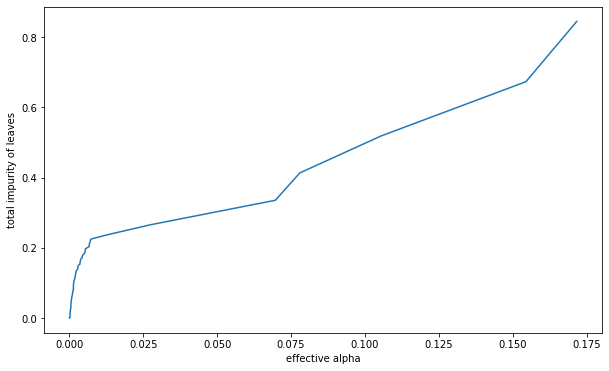

In [7]:
clf = DecisionTreeClassifier(random_state = 0)
path = clf.cost_complexity_pruning_path(x_train, y_train)
#decision_tree_model = decision_tree_clf.fit(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

In [14]:
clfs = []
i = 1
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    clf.fit(x_train, y_train)
    print(i)
    i += 1
    clfs.append(clf)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198


Text(0, 0.5, 'total depth')

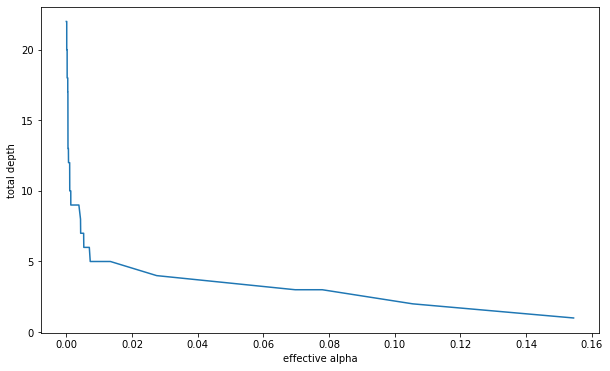

In [15]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

Text(0, 0.5, 'Accuracy scores')

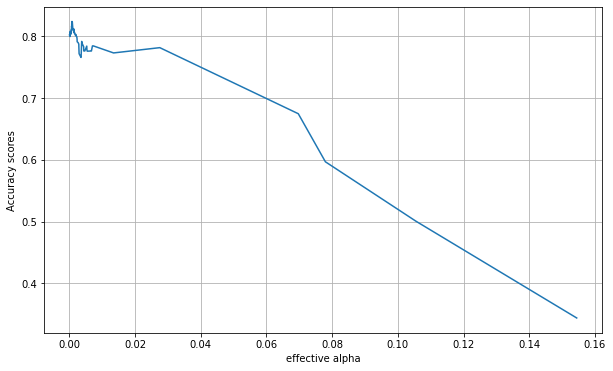

In [16]:
from sklearn.metrics import accuracy_score

acc_scores = [accuracy_score(y_test, clf.predict(x_test)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

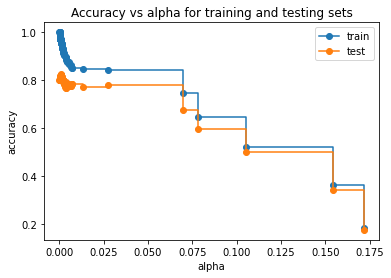

In [18]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()


In [149]:
temp_clf = DecisionTreeClassifier(random_state = 0, ccp_alpha = 0.007)
temp_model = temp_clf.fit(x_train, y_train)
y_pred = temp_model.predict(x_test)
accuracy_score(y_pred, y_test)

0.7770398481973435

In [92]:
from sklearn.metrics import cohen_kappa_score

In [93]:
cohen_kappa_score(y_pred, y_test)

0.6121011358360974

In [31]:
from sklearn.metrics import confusion_matrix

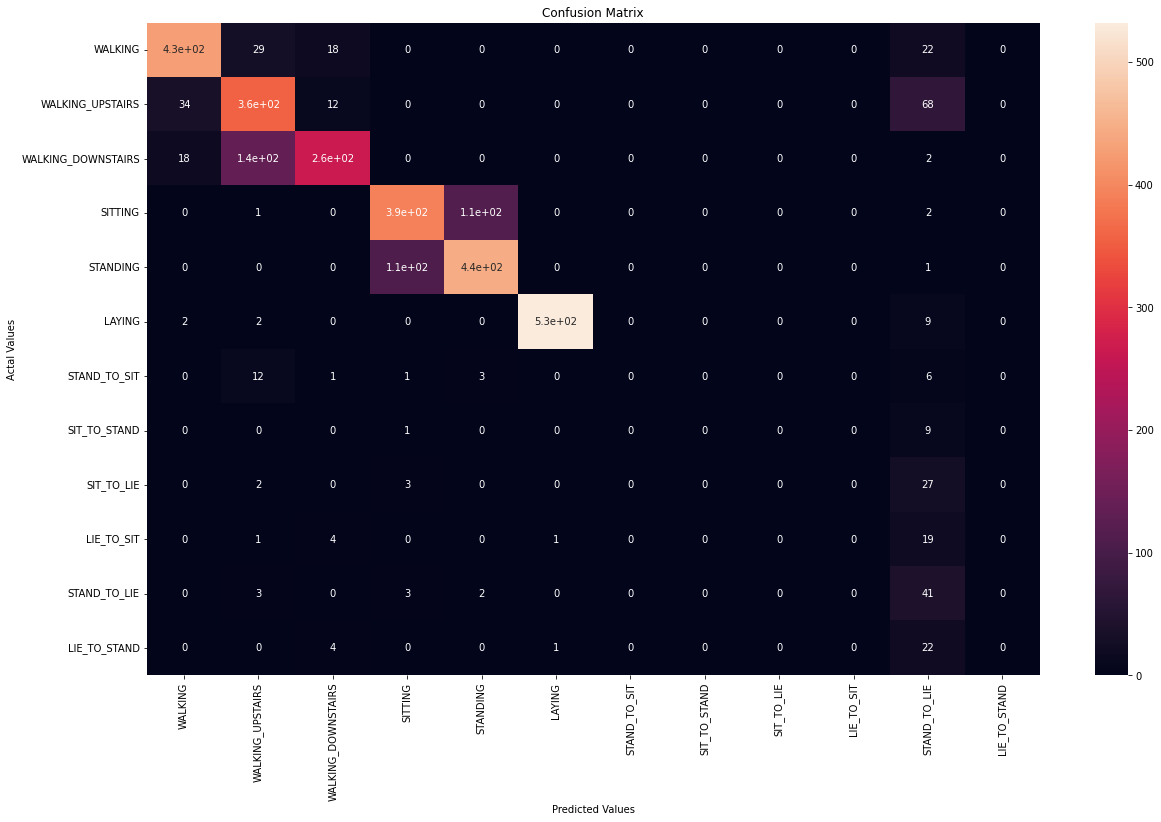

In [150]:
y_pred = temp_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
label_dict = {1: 'WALKING',           
2: 'WALKING_UPSTAIRS',  
3: 'WALKING_DOWNSTAIRS',
4: 'SITTING',           
5: 'STANDING',          
6: 'LAYING',            
7: 'STAND_TO_SIT',      
8: 'SIT_TO_STAND',      
9: 'SIT_TO_LIE',        
10: 'LIE_TO_SIT',        
11: 'STAND_TO_LIE',      
12: 'LIE_TO_STAND'}
cm_df = pd.DataFrame(cm,
                     index = [label_dict[i] for i in range(1,13)], 
                     columns = [label_dict[i] for i in range(1,13)])
plt.figure(figsize=(20,12))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [82]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [5, 10, 15]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 4, 8, 16]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]
# Method of selecting samples for training each tree
bootstrap = [True]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [83]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.89545513 0.89635638 0.88283765 0.89880263 0.88206515 0.89391013
 0.89957513 0.8767864  0.88991889        nan 0.88335265 0.89828763
 0.89352388 0.8839964  0.90034762 0.90433887 0.89249388 0.90549762
 0.87176516 0.90009012        nan 0.90034762 0.89674263 0.89931763
 0.88811639 0.85901893 0.8806489  0.89249388 0.89931763 0.88412514]
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 1557,
 'min_samples_split': 4,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [95]:
rf.fit(x_train, y_train.values.ravel())

RandomForestClassifier()

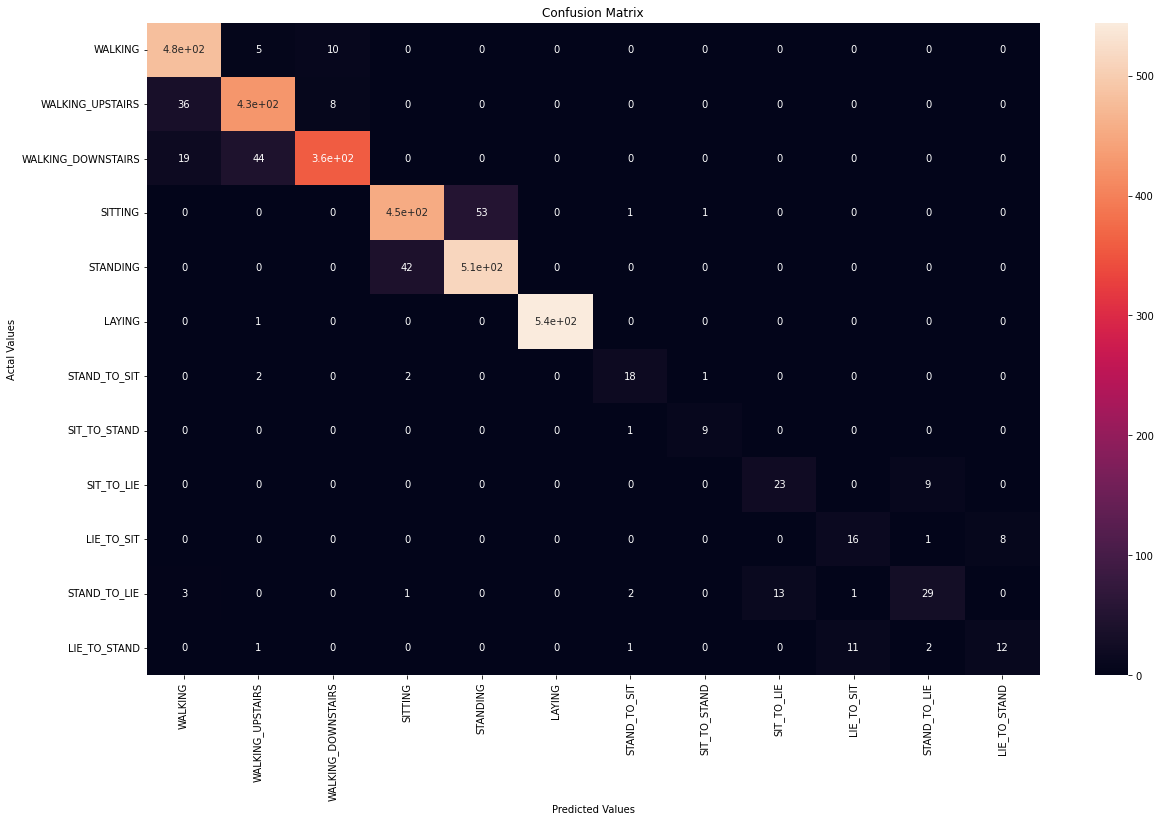

In [96]:
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = [label_dict[i] for i in range(1,13)], 
                     columns = [label_dict[i] for i in range(1,13)])
plt.figure(figsize=(20,12))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [99]:
cohen_kappa_score(y_pred, y_test)
accuracy_score(y_test, y_pred)

0.8959373235047238

In [100]:
best_random = rf_random.best_estimator_
best_random.fit(x_train, y_train.values.ravel())
y_pred = best_random.predict(x_test)
#accuracy_score(y_test, y_pred)
cohen_kappa_score(y_pred, y_test)

0.8857876459876438

In [86]:
from imblearn.over_sampling import RandomOverSampler
weight = {7:700,8:700,9:700,10:700,11:700,12:700}
weight2 = {7:250,8:250,9:250,10:250,11:250,12:250}
oversample = RandomOverSampler(sampling_strategy = weight)
oversample2 = RandomOverSampler(sampling_strategy = weight2)
x_over, y_over = oversample.fit_resample(x_train, y_train)
x_over_test, y_over_test = oversample2.fit_resample(x_test, y_test)

In [87]:
rf.fit(x_over, y_over.values.ravel())
y_pred = rf.predict(x_over_test)
accuracy_score(y_over_test, y_pred)

0.8663256227758007

In [88]:
best_random = rf_random.best_estimator_
best_random.fit(x_over, y_over.values.ravel())
y_pred = best_random.predict(x_over_test)
accuracy_score(y_over_test, y_pred)

0.8772241992882562

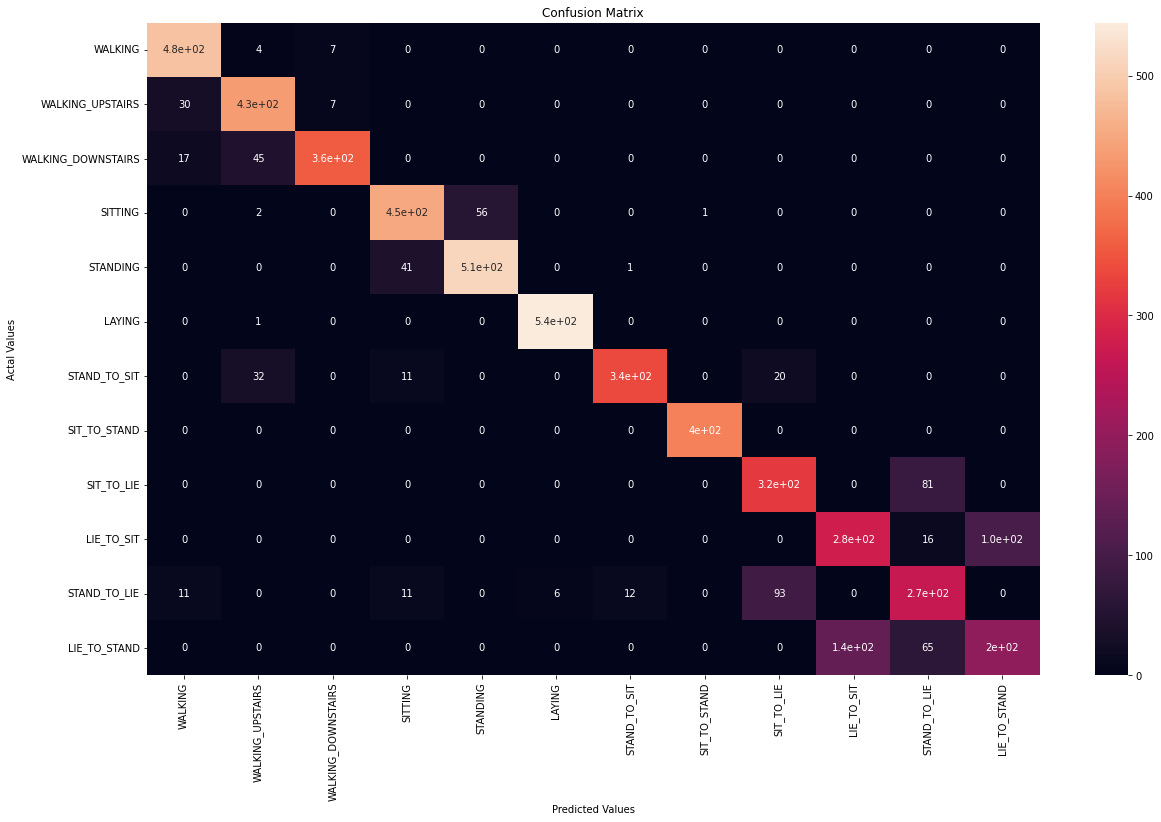

In [57]:
cm = confusion_matrix(y_over_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = [label_dict[i] for i in range(1,13)], 
                     columns = [label_dict[i] for i in range(1,13)])
plt.figure(figsize=(20,12))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [76]:
df = pd.concat([x_train, y_train], axis=1)
df2 = pd.concat([x_test, y_test], axis=1)
df.head()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,tBodyAcc-Max-2,tBodyAcc-Max-3,tBodyAcc-Min-1,tBodyAcc-Min-2,tBodyAcc-Min-3,tBodyAcc-SMA-1,tBodyAcc-Energy-1,tBodyAcc-Energy-2,tBodyAcc-Energy-3,tBodyAcc-IQR-1,tBodyAcc-IQR-2,tBodyAcc-IQR-3,tBodyAcc-ropy-1,tBodyAcc-ropy-2,tBodyAcc-ropy-3,tBodyAcc-ARCoeff-1,tBodyAcc-ARCoeff-2,tBodyAcc-ARCoeff-3,tBodyAcc-ARCoeff-4,tBodyAcc-ARCoeff-5,tBodyAcc-ARCoeff-6,tBodyAcc-ARCoeff-7,tBodyAcc-ARCoeff-8,tBodyAcc-ARCoeff-9,tBodyAcc-ARCoeff-10,tBodyAcc-ARCoeff-11,tBodyAcc-ARCoeff-12,tBodyAcc-Correlation-1,tBodyAcc-Correlation-2,tBodyAcc-Correlation-3,tGravityAcc-Mean-1,tGravityAcc-Mean-2,tGravityAcc-Mean-3,tGravityAcc-STD-1,tGravityAcc-STD-2,tGravityAcc-STD-3,tGravityAcc-Mad-1,tGravityAcc-Mad-2,tGravityAcc-Mad-3,tGravityAcc-Max-1,tGravityAcc-Max-2,tGravityAcc-Max-3,tGravityAcc-Min-1,tGravityAcc-Min-2,tGravityAcc-Min-3,tGravityAcc-SMA-1,tGravityAcc-Energy-1,tGravityAcc-Energy-2,tGravityAcc-Energy-3,tGravityAcc-IQR-1,tGravityAcc-IQR-2,tGravityAcc-IQR-3,tGravityAcc-ropy-1,tGravityAcc-ropy-2,tGravityAcc-ropy-3,tGravityAcc-ARCoeff-1,tGravityAcc-ARCoeff-2,tGravityAcc-ARCoeff-3,tGravityAcc-ARCoeff-4,tGravityAcc-ARCoeff-5,tGravityAcc-ARCoeff-6,tGravityAcc-ARCoeff-7,tGravityAcc-ARCoeff-8,tGravityAcc-ARCoeff-9,tGravityAcc-ARCoeff-10,tGravityAcc-ARCoeff-11,tGravityAcc-ARCoeff-12,tGravityAcc-Correlation-1,tGravityAcc-Correlation-2,tGravityAcc-Correlation-3,tBodyAccJerk-Mean-1,tBodyAccJerk-Mean-2,tBodyAccJerk-Mean-3,tBodyAccJerk-STD-1,tBodyAccJerk-STD-2,tBodyAccJerk-STD-3,tBodyAccJerk-Mad-1,tBodyAccJerk-Mad-2,tBodyAccJerk-Mad-3,tBodyAccJerk-Max-1,tBodyAccJerk-Max-2,tBodyAccJerk-Max-3,tBodyAccJerk-Min-1,tBodyAccJerk-Min-2,tBodyAccJerk-Min-3,tBodyAccJerk-SMA-1,tBodyAccJerk-Energy-1,tBodyAccJerk-Energy-2,tBodyAccJerk-Energy-3,tBodyAccJerk-IQR-1,tBodyAccJerk-IQR-2,tBodyAccJerk-IQR-3,tBodyAccJerk-ropy-1,tBodyAccJerk-ropy-2,tBodyAccJerk-ropy-3,tBodyAccJerk-ARCoeff-1,tBodyAccJerk-ARCoeff-2,tBodyAccJerk-ARCoeff-3,tBodyAccJerk-ARCoeff-4,tBodyAccJerk-ARCoeff-5,tBodyAccJerk-ARCoeff-6,tBodyAccJerk-ARCoeff-7,tBodyAccJerk-ARCoeff-8,tBodyAccJerk-ARCoeff-9,tBodyAccJerk-ARCoeff-10,tBodyAccJerk-ARCoeff-11,tBodyAccJerk-ARCoeff-12,tBodyAccJerk-Correlation-1,tBodyAccJerk-Correlation-2,tBodyAccJerk-Correlation-3,tBodyGyro-Mean-1,tBodyGyro-Mean-2,tBodyGyro-Mean-3,tBodyGyro-STD-1,tBodyGyro-STD-2,tBodyGyro-STD-3,tBodyGyro-Mad-1,tBodyGyro-Mad-2,tBodyGyro-Mad-3,tBodyGyro-Max-1,tBodyGyro-Max-2,tBodyGyro-Max-3,tBodyGyro-Min-1,tBodyGyro-Min-2,tBodyGyro-Min-3,tBodyGyro-SMA-1,tBodyGyro-Energy-1,tBodyGyro-Energy-2,tBodyGyro-Energy-3,tBodyGyro-IQR-1,tBodyGyro-IQR-2,tBodyGyro-IQR-3,tBodyGyro-ropy-1,tBodyGyro-ropy-2,tBodyGyro-ropy-3,tBodyGyro-ARCoeff-1,tBodyGyro-ARCoeff-2,tBodyGyro-ARCoeff-3,tBodyGyro-ARCoeff-4,tBodyGyro-ARCoeff-5,tBodyGyro-ARCoeff-6,tBodyGyro-ARCoeff-7,tBodyGyro-ARCoeff-8,tBodyGyro-ARCoeff-9,tBodyGyro-ARCoeff-10,tBodyGyro-ARCoeff-11,tBodyGyro-ARCoeff-12,tBodyGyro-Correlation-1,tBodyGyro-Correlation-2,tBodyGyro-Correlation-3,tBodyGyroJerk-Mean-1,tBodyGyroJerk-Mean-2,tBodyGyroJerk-Mean-3,tBodyGyroJerk-STD-1,tBodyGyroJerk-STD-2,tBodyGyroJerk-STD-3,tBodyGyroJerk-Mad-1,tBodyGyroJerk-Mad-2,tBodyGyroJerk-Mad-3,tBodyGyroJerk-Max-1,tBodyGyroJerk-Max-2,tBodyGyroJerk-Max-3,tBodyGyroJerk-Min-1,tBodyGyroJerk-Min-2,tBodyGyroJerk-Min-3,tBodyGyroJerk-SMA-1,tBodyGyroJerk-Energy-1,tBodyGyroJerk-Energy-2,tBodyGyroJerk-Energy-3,tBodyGyroJerk-IQR-1,tBodyGyroJerk-IQR-2,tBodyGyroJerk-IQR-3,tBodyGyroJerk-ropy-1,tBodyGyroJerk-ropy-2,tBodyGyroJerk-ropy-3,tBodyGyroJerk-ARCoeff-1,tBodyGyroJerk-ARCoeff-2,tBodyGyroJerk-ARCoeff-3,tBodyGyroJerk-ARCoeff-4,tBodyGyroJerk-ARCoeff-5,tBodyGyroJerk-ARCoeff-6,tBodyGyroJerk-ARCoeff-7,tBodyGyroJerk-ARCoeff-8,tBodyGyroJerk-ARCoeff-9,tBodyGyroJerk-ARCoeff-10,tBodyGyroJerk-ARCoeff-11,tBodyGyroJerk-ARCoeff-12,tBodyGyroJerk-Correlation-1,tBodyGyroJerk-Correlation-2,tBodyGyroJerk-Correlation-3,tBodyAccMag-Mean-1,tBodyAccMa

In [78]:
new_df = df.loc[df['Activity'] < 7]
new_df2 = df2.loc[df2['Activity'] < 7]
new_x_train = new_df.iloc[:,:561]
new_y_train = new_df['Activity']
new_x_test = new_df2.iloc[:,:561]
new_y_test = new_df2['Activity']

In [79]:
rf.fit(new_x_train, new_y_train)
y_pred = rf.predict(new_x_test)
accuracy_score(new_y_test, y_pred)

0.9225634178905207

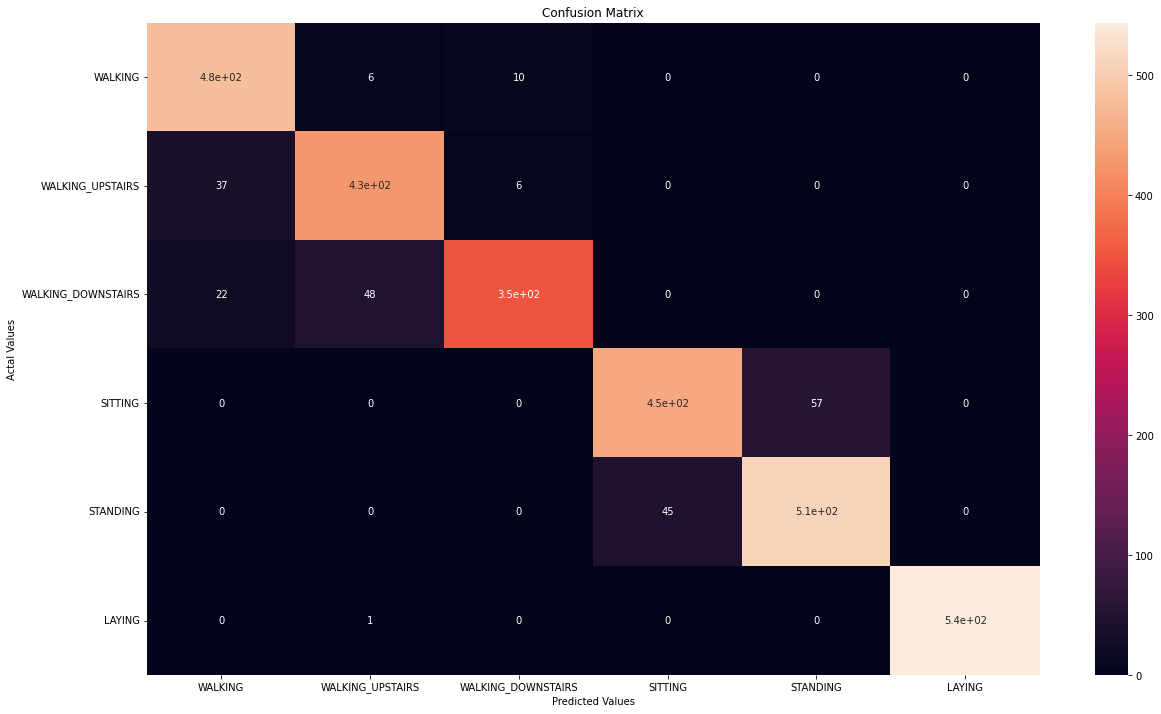

In [81]:
cm = confusion_matrix(new_y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = [label_dict[i] for i in range(1,7)], 
                     columns = [label_dict[i] for i in range(1,7)])
plt.figure(figsize=(20,12))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

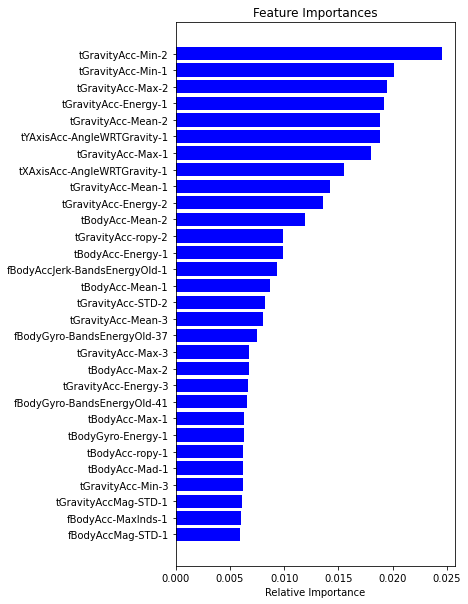

In [153]:
importances = rf.feature_importances_
feature_names = x_train.columns
indices = np.argsort(importances)

num_features = 30 

plt.figure(figsize=(5,10))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

In [138]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(rf)
sel.fit(x_over, y_over.values.ravel())

SelectFromModel(estimator=RandomForestClassifier())

In [140]:
x_train.columns[sel.get_support()]

Index(['tBodyAcc-Mean-1', 'tBodyAcc-Mean-2', 'tBodyAcc-STD-1',
       'tBodyAcc-Mad-1', 'tBodyAcc-Max-1', 'tBodyAcc-Max-2', 'tBodyAcc-Min-1',
       'tBodyAcc-Min-2', 'tBodyAcc-SMA-1', 'tBodyAcc-Energy-1',
       ...
       'fBodyAccMag-Max-1', 'fBodyAccMag-SMA-1', 'fBodyAccMag-Energy-1',
       'fBodyAccMag-MaxInds-1', 'fBodyAccMag-MeanFreq-1',
       'fBodyAccMag-Skewness-1', 'tBodyAccJerk-AngleWRTGravity-1',
       'tXAxisAcc-AngleWRTGravity-1', 'tYAxisAcc-AngleWRTGravity-1',
       'tZAxisAcc-AngleWRTGravity-1'],
      dtype='object', length=150)

<AxesSubplot:xlabel='tGravityAcc-Min-2', ylabel='tGravityAcc-Min-1'>

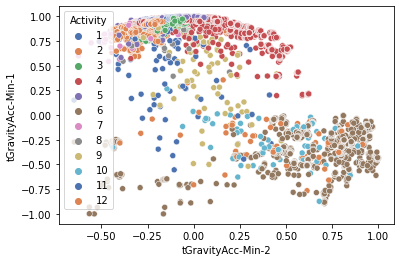

In [144]:
sns.scatterplot(data = df, x = "tGravityAcc-Min-2", y = "tGravityAcc-Min-1", hue = "Activity", palette = "deep")

<AxesSubplot:xlabel='tGravityAcc-Min-2', ylabel='tGravityAcc-Max-2'>

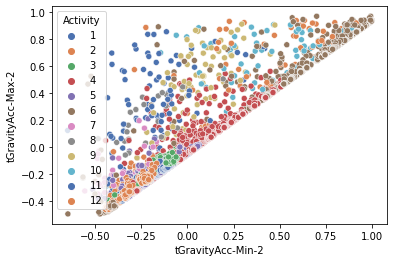

In [146]:
sns.scatterplot(data = df, x = "tGravityAcc-Min-2", y = "tGravityAcc-Max-2", hue = "Activity", palette = "deep")

<AxesSubplot:xlabel='tGravityAcc-Min-2', ylabel='tGravityAcc-Min-1'>

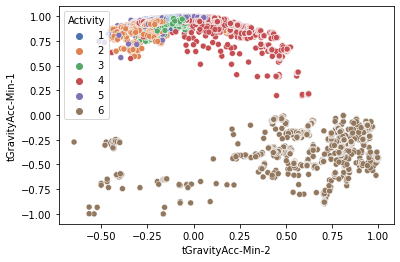

In [147]:
sns.scatterplot(data = new_df, x = "tGravityAcc-Min-2", y = "tGravityAcc-Min-1", hue = "Activity", palette = "deep")

<AxesSubplot:xlabel='tGravityAcc-Min-2', ylabel='tGravityAcc-Max-2'>

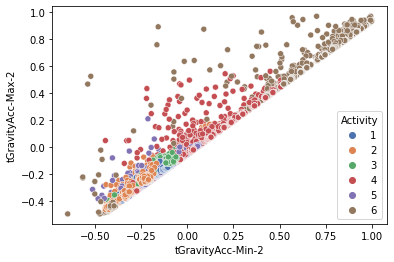

In [148]:
sns.scatterplot(data = new_df, x = "tGravityAcc-Min-2", y = "tGravityAcc-Max-2", hue = "Activity", palette = "deep")

-SMOTE